<a href="https://colab.research.google.com/github/Ioln/DataIoannis/blob/main/DataIoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NBA ANALYTICS

Importing the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

Downloading the logos.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Philadelphia.png to Philadelphia.png
Saving Miami.png to Miami.png
Saving Chicago.png to Chicago.png
Saving Detroit.png to Detroit.png
Saving Memphis.png to Memphis.png
Saving New Orleans.png to New Orleans.png
Saving Utah.png to Utah.png
Saving Boston.png to Boston.png
Saving New York.png to New York.png
Saving Denver.png to Denver.png
Saving Portland.png to Portland.png
Saving Brooklyn.png to Brooklyn.png
Saving Minnesota.png to Minnesota.png
Saving Charlotte.png to Charlotte.png
Saving L.A. Clippers.png to L.A. Clippers.png
Saving San Antonio.png to San Antonio.png
Saving Orlando.png to Orlando.png
Saving Washington.png to Washington.png
Saving Milwaukee.png to Milwaukee.png
Saving Indiana.png to Indiana.png
Saving Golden State.png to Golden State.png
Saving Dallas.png to Dallas.png
Saving Oklahoma City.png to Oklahoma City.png
Saving Phoenix.png to Phoenix.png
Saving Sacramento.png to Sacramento.png
Saving Cleveland.png to Cleveland.png
Saving Houston.png to Houston.png
Savi

Downloading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATANBA2.xlsx to DATANBA2.xlsx


In [ ]:
from unittest import mock
# Set max font family value to 100
p = mock.patch('openpyxl.styles.fonts.Font.family.max', new=100)
p.start()
import openpyxl
openpyxl.open('DATANBA2.xlsx') # this works now!

Taking the column averages

In [ ]:
df = pd.read_excel('DATANBA2.xlsx')
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


TS%           0.562733
eFG%          0.525333
Total S%    158.286667
ORB%         24.873333
DRB%         75.203333
TRB%         49.946667
AST%         58.893333
eDiff         0.443333
ORtg        112.450000
DRtg        111.996667
dtype: float64

Inserting the logos in our DataSet.

In [ ]:
df['path'] = df['Team'] + '.png'
df.head()

,Team,TS%,eFG%,Total S%,ORB%,DRB%,TRB%,AST%,eDiff,ORtg,DRtg,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,path
0,Cleveland,0.539,0.502,154.4,20.0,73.9,45.3,55.8,13.1,117.9,104.7,STL%,BLK%,PPS,FIC40,ORtg,DRtg,eDiff,Cleveland.png
1,Dallas,0.589,0.552,164.2,15.5,71.3,42.4,59.3,12.9,122.9,110.1,12.2,8.8,1.2,59.1,117.9,104.7,13.1,Dallas.png
2,Phoenix,0.554,0.514,151.5,21.6,75.3,49.0,50.7,11.5,116.0,104.5,5.3,11.9,1.3,57.0,122.9,110.1,12.9,Phoenix.png
3,Milwaukee,0.504,0.469,155.3,20.8,82.4,48.9,51.4,11.4,111.0,99.6,7.7,6.6,1.3,58.1,116.0,104.5,11.5,Milwaukee.png
4,New York,0.505,0.470,136.8,30.1,69.7,50.0,57.3,11.1,116.3,105.2,7.6,10.4,1.1,58.9,111.0,99.6,11.4,New York.png


Creating Scatterplot

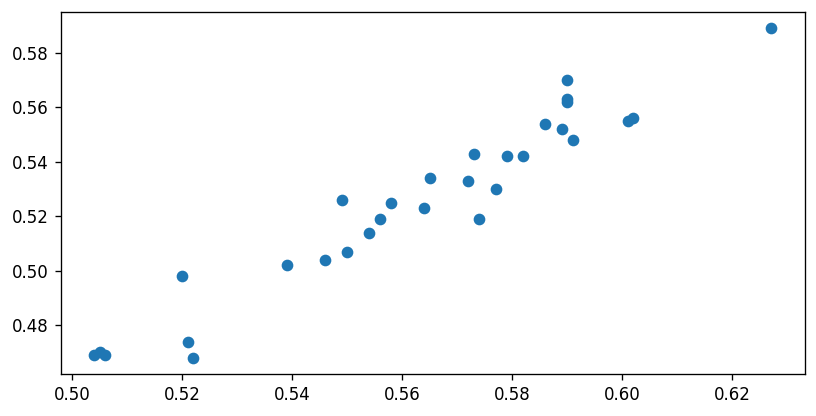

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
ax.scatter(df['TS%'], df['eFG%'])

In [ ]:
def getImage(path):
  return OffsetImage(plt.imread(path), zoom = .75, alpha = 1)

Creating the averages and placing the logos on our chart.

Text(0, 0.5, 'Rating Defensivo')

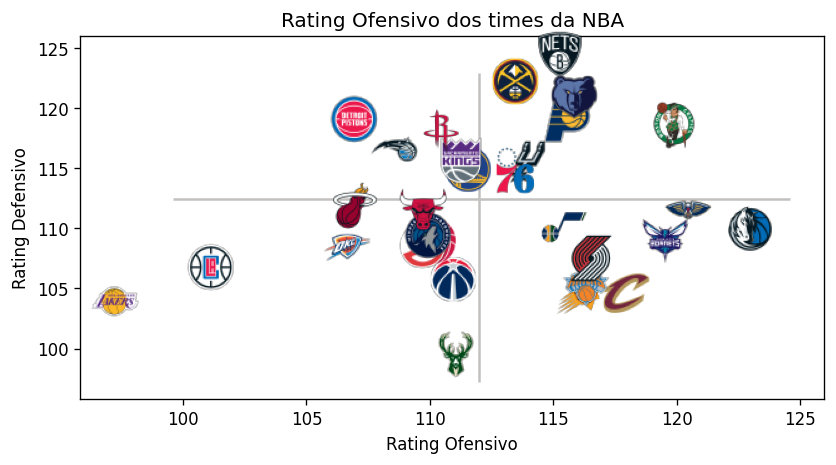

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi = 120)
ax.scatter(df['ORtg'], df['DRtg'], color = 'white')

for index, row in df.iterrows():
  ab = AnnotationBbox(getImage(row['path']), (row['ORtg'], row['DRtg']), frameon = False)
  ax.add_artist(ab)
plt.hlines(df['ORtg'].mean(), df['DRtg'].min(), df['DRtg'].max(), color='#c2c1c0')
plt.vlines(df['DRtg'].mean(), df['ORtg'].min(), df['ORtg'].max(), color='#c2c1c0')

plt.title('Rating Ofensivo dos times da NBA')
plt.xlabel('Rating Ofensivo')
plt.ylabel('Rating Defensivo')